# Aggregation 📚

### After this encounter we will have covered 
- how to apply different aggregation methods to your datasets
- explanation of what .groupby() does and some options on how apply it to your datasets

In [129]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## 1. Applying aggregation methods: 

In [133]:
df = pd.read_csv("large_countries_2015.csv", sep = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     12 non-null     object 
 1   population  12 non-null     float64
 2   fertility   12 non-null     float64
 3   continent   12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes


In [134]:
df["population"] = (df["population"]/1000).astype(int)

In [135]:
df.head(2)

,country,population,fertility,continent
0,Bangladesh,160995,2.12,Asia
1,Brazil,207847,1.78,South America


Let's apply some aggregation methods!
Intuition of "aggregation": take some rows, apply some kind of "operation" on them and return a resumed version of these rows.

In [136]:
df.sum()

country       BangladeshBrazilChinaIndiaIndonesiaJapanMexico...
population                                              4504146
fertility                                                 29.25
continent     AsiaSouth AmericaAsiaAsiaAsiaAsiaNorth America...
dtype: object

If we apply .sum() to the complete dataframe, strings will be concatenated. 

In [137]:
df["population"].sum()

4504146

In [138]:
df[["population", "fertility"]].sum()

population    4504146.00
fertility          29.25
dtype: float64

In [139]:
df["country"].count()

12

In [140]:
df["country"].value_counts()

Indonesia        1
United States    1
Nigeria          1
India            1
Pakistan         1
Russia           1
China            1
Philippines      1
Mexico           1
Brazil           1
Bangladesh       1
Japan            1
Name: country, dtype: int64

In [141]:
df["country"].unique()

array(['Bangladesh', 'Brazil', 'China', 'India', 'Indonesia', 'Japan',
       'Mexico', 'Nigeria', 'Pakistan', 'Philippines', 'Russia',
       'United States'], dtype=object)

In [142]:
df.describe()

,population,fertility
count,1.200000e+01,12.000000
mean,3.753455e+05,2.437500
std,4.565193e+05,1.200781
min,1.006990e+05,1.450000
25%,1.393462e+05,1.737500
50%,1.855625e+05,2.125000
75%,2.736155e+05,2.567500
max,1.376048e+06,5.890000


.agg() can be used to aggregate more "modularly":

In [143]:
df.agg(
    {"population":"mean",
    "fertility":"median"
    }
)

population    375345.500
fertility          2.125
dtype: float64

In [144]:
df.agg(
    ["median","mean","std"]
)

,population,fertility
median,185562.500000,2.125000
mean,375345.500000,2.437500
std,456519.344768,1.200781


In [145]:
def double(x):
    return 2*x

In [148]:
df.agg(
    {"population":"mean",
    "fertility":double
    }
)

In [90]:
df[["population", "fertility"]].agg(
    ["median","mean"]
)

,population,fertility
median,185562.5,2.1250
mean,375345.5,2.4375


## 2. .groupby()

What DOES .groupby() actually do?
1. it **splits** the data
2. it **applies** some kind of operation ON THE GROUPED data
3. it **combines** the data back into a new (pandas) object (i.e. series or dataframe)

In [149]:
g = df.groupby('continent')
g

In [92]:
for index, elements in g: 
    print(index)
    print(elements)
    print('/n')
      # i want to open the group by and see inside

Africa
   country  population  fertility continent
7  Nigeria      182201       5.89    Africa
/n
Asia
       country  population  fertility continent
0   Bangladesh      160995       2.12      Asia
2        China     1376048       1.57      Asia
3        India     1311050       2.43      Asia
4    Indonesia      257563       2.28      Asia
5        Japan      126573       1.45      Asia
8     Pakistan      188924       3.04      Asia
9  Philippines      100699       2.98      Asia
/n
Europe
   country  population  fertility continent
10  Russia      143456       1.61    Europe
/n
North America
          country  population  fertility      continent
6          Mexico      127017       2.13  North America
11  United States      321773       1.97  North America
/n
South America
  country  population  fertility      continent
1  Brazil      207847       1.78  South America
/n


In [93]:
g.get_group('Asia')

,country,population,fertility,continent
0,Bangladesh,160995,2.12,Asia
2,China,1376048,1.57,Asia
3,India,1311050,2.43,Asia
4,Indonesia,257563,2.28,Asia
5,Japan,126573,1.45,Asia
8,Pakistan,188924,3.04,Asia
9,Philippines,100699,2.98,Asia


In [94]:
g2 = df.groupby('continent')['population'].mean()
g2

continent
Africa           182201.000000
Asia             503121.714286
Europe           143456.000000
North America    224395.000000
South America    207847.000000
Name: population, dtype: float64

In [95]:
g2 = df.groupby('continent')['population','fertility'].mean()
g2

,population,fertility
continent,,
Africa,182201.000000,5.890000
Asia,503121.714286,2.267143
Europe,143456.000000,1.610000
North America,224395.000000,2.050000
South America,207847.000000,1.780000


In [97]:
g2 = df.groupby(['continent','country'])['population','fertility'].mean()
g2

population  fertility
continent     country                             
Africa        Nigeria            182201       5.89
Asia          Bangladesh         160995       2.12
              China             1376048       1.57
              India             1311050       2.43
              Indonesia          257563       2.28
              Japan              126573       1.45
              Pakistan           188924       3.04
              Philippines        100699       2.98
Europe        Russia             143456       1.61
North America Mexico             127017       2.13
              United States      321773       1.97
South America Brazil             207847       1.78

In [68]:
g3 = df.groupby(['continent','country'])
g3

In [42]:
for index, elements in g3: 
    print(index)
    print(elements)
    print('/n')

('Africa', 'Nigeria')
   country  population  fertility continent
7  Nigeria      182201       5.89    Africa
/n
('Asia', 'Bangladesh')
      country  population  fertility continent
0  Bangladesh      160995       2.12      Asia
/n
('Asia', 'China')
  country  population  fertility continent
2   China     1376048       1.57      Asia
/n
('Asia', 'India')
  country  population  fertility continent
3   India     1311050       2.43      Asia
/n
('Asia', 'Indonesia')
     country  population  fertility continent
4  Indonesia      257563       2.28      Asia
/n
('Asia', 'Japan')
  country  population  fertility continent
5   Japan      126573       1.45      Asia
/n
('Asia', 'Pakistan')
    country  population  fertility continent
8  Pakistan      188924       3.04      Asia
/n
('Asia', 'Philippines')
       country  population  fertility continent
9  Philippines      100699       2.98      Asia
/n
('Europe', 'Russia')
   country  population  fertility continent
10  Russia      143456     

In [102]:
#                   index             variable to calculate       which calculations
g5 = df.groupby(['continent','country'])['population'].agg(['min','median',double])
g5

min   median   double
continent     country                                 
Africa        Nigeria         182201   182201   364402
Asia          Bangladesh      160995   160995   321990
              China          1376048  1376048  2752096
              India          1311050  1311050  2622100
              Indonesia       257563   257563   515126
              Japan           126573   126573   253146
              Pakistan        188924   188924   377848
              Philippines     100699   100699   201398
Europe        Russia          143456   143456   286912
North America Mexico          127017   127017   254034
              United States   321773   321773   643546
South America Brazil          207847   207847   415694

After grouping, we can now "mix" between aggregations and transformations, combining .groupby() with .agg() and our customized function from above.

In [103]:
g6 = df.groupby(['continent','country'])['population','fertility'].agg(['min','median',double])
g6

population                   fertility         \
                                   min   median   double       min median   
continent     country                                                       
Africa        Nigeria           182201   182201   364402      5.89   5.89   
Asia          Bangladesh        160995   160995   321990      2.12   2.12   
              China            1376048  1376048  2752096      1.57   1.57   
              India            1311050  1311050  2622100      2.43   2.43   
              Indonesia         257563   257563   515126      2.28   2.28   
              Japan             126573   126573   253146      1.45   1.45   
              Pakistan          188924   188924   377848      3.04   3.04   
              Philippines       100699   100699   201398      2.98   2.98   
Europe        Russia            143456   143456   286912      1.61   1.61   
North America Mexico            127017   127017   254034      2.13   2.13   
              United States     321773   321773   643546      1.97   1.97   
South America Brazil            207847   207847   415694      1.78   1.78   

                                    
                            double  
continent     country               
Africa        Nigeria        11.78  
Asia          Bangladesh      4.24  
              China           3.14  
              India           4.86  
              Indonesia       4.56  
              Japan           2.90  
              Pakistan        6.08  
              Philippines     5.96  
Europe        Russia          3.22  
North America Mexico          4.26  
              United States   3.94  
South America Brazil          3.56

Applying transformations to selected cols:

In [105]:
# .apply to a function a build in function z.b. double() 
g5.transform(double)

#### the transform() function applies the calculations only to numerical data 

min   median   double
continent     country                                 
Africa        Nigeria         364402   364402   728804
Asia          Bangladesh      321990   321990   643980
              China          2752096  2752096  5504192
              India          2622100  2622100  5244200
              Indonesia       515126   515126  1030252
              Japan           253146   253146   506292
              Pakistan        377848   377848   755696
              Philippines     201398   201398   402796
Europe        Russia          286912   286912   573824
North America Mexico          254034   254034   508068
              United States   643546   643546  1287092
South America Brazil          415694   415694   831388

In [107]:

g5.apply(double) # applies the function double to all adata, numerical and categorical

min   median   double
continent     country                                 
Africa        Nigeria         364402   364402   728804
Asia          Bangladesh      321990   321990   643980
              China          2752096  2752096  5504192
              India          2622100  2622100  5244200
              Indonesia       515126   515126  1030252
              Japan           253146   253146   506292
              Pakistan        377848   377848   755696
              Philippines     201398   201398   402796
Europe        Russia          286912   286912   573824
North America Mexico          254034   254034   508068
              United States   643546   643546  1287092
South America Brazil          415694   415694   831388

In [108]:
g6 = df.groupby(['continent'])['population','fertility'].mean()
g6

,population,fertility
continent,,
Africa,182201.000000,5.890000
Asia,503121.714286,2.267143
Europe,143456.000000,1.610000
North America,224395.000000,2.050000
South America,207847.000000,1.780000


Plotting examples:

<AxesSubplot:ylabel='continent'>

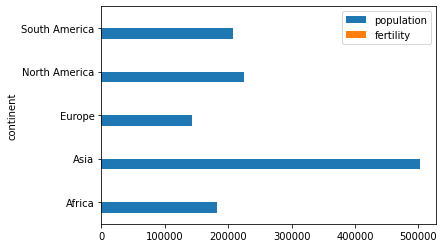

In [109]:
g6.plot.barh()

<AxesSubplot:xlabel='continent'>

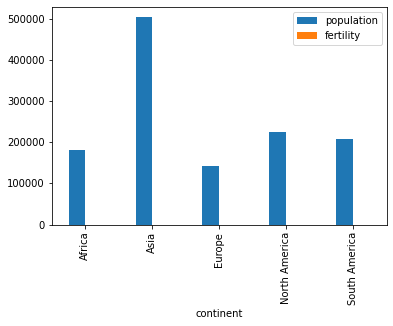

In [110]:
g6.plot.bar()

<AxesSubplot:ylabel='continent'>

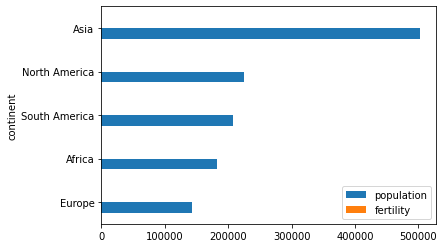

In [152]:
g6.sort_values(by=['population','fertility']).plot.barh(alpha = None)

In [122]:
g7 = df.groupby(['continent','country'])
g7

<AxesSubplot:ylabel='continent'>

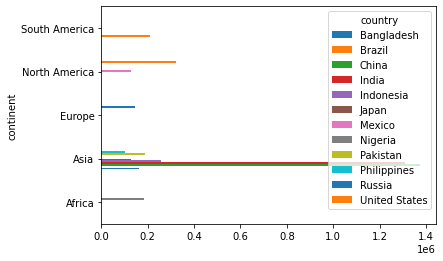

In [127]:
g7['population'].mean().unstack(1).plot.barh()

<AxesSubplot:ylabel='country'>

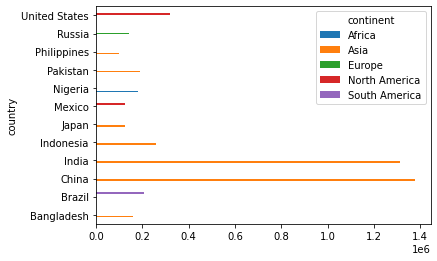

In [128]:
g7['population'].mean().unstack(0).plot.barh()

## Comments and questions during the encounter